<a id="TOC"></a>
### Table of Contents
- [Imports](#imports)
- [Code](#code)
- [Figure 3](#fig3)
- [Figure 4](#fig4)
- [Figure 5](#fig5)
- [Figure 6](#fig6)


<a id="imports"></a>
# Imports
[Return](#TOC)

In [10]:
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors

%matplotlib inline
import pandas as pd
from scipy.stats import fisher_exact, ttest_ind

import sys
import glob
sys.path.append("./Files/")
sys.path.append('./Code/')

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import StepMiner as smn
reload(smn)
import HegemonUtil as hu
reload(hu)
import warnings
warnings.filterwarnings('ignore')
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import Datasets
reload(Datasets)
import MacUtils as mut
reload(mut)
import bone
reload(bone)
import altair as alt

<a id="code"></a>
# Code
[Return](#TOC)

In [281]:
#confPath='./Files/Yeti_explore.conf'
#confPathGlobal='./Files/Debashis_explore.conf'

import bone
reload(bone)
aHegePath =  "/Users/aglina/public_html/Hegemon/explore.conf"
yHegePath = '/Users/yovosko/public_html/Hegemon/explore.conf'
confPathGlobal='/booleanfs2/sahoo/Hegemon/explore.conf'

def readLst(file,sep2=',',filt=set(['[']),lstSep=']'):
    """
    Inputs:
        file, str, path/name of file with list info
        sep2, str, what to use as a seperator for within lines of file
        filt, lst of strs, list of strings to filter out 
        lstSep, str, if the file contains a list within it string that repersents the end of that list
    Output:
        list of elements within file, split by \n and sep2
    """
    out=[]
    out1=[]
    with open(file) as f:
        for line in f:
            if lstSep in line:
                if len(out1)>0:
                    out.append(out1)
                    out1=[]
            for fil in filt:
                line=line.replace(fil,'')
            line=line.replace('\n','').replace(lstSep,'')
            if sep2!=' ':
                line=line.replace(' ','')
            out1.extend(line.split(sep2))
        out.append(out1)
    if len(out)==1:
        out=out[0]
    return out

def saveLst(lst,file):
    """
    saveLst:
        Input:
            lst, a list
            file, name of the file to create and save output to
        Actions: 
            Each element in the given list, is saved as a line in the file 
        Returns: 
            The name of the created file
    """
    with open(file,'w') as f:
        for num in range(len(lst)-1):
            elem = str(lst[num]);f.write(elem+'\n')
        elem = str(lst[len(lst)-1]);f.write(elem)
    return file

class ExerciseAnalysis(bone.IBDAnalysis):
    def __init__(self):
        bone.IBDAnalysis.__init__(self)
        
    def getMarosi2018(self, tn=1):
        self.prepareData("M6",yHegePath)
        if tn==1:
            atype=self.h.getSurvName("c treatment (ch1)")
            ahash = {'Alternate day fasting':0,'Exercised_Alternate day fasting':1}
            atypes=['Pre','45 Min Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPopov2019(self, tn=1):
        self.prepareData("M5",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c training status (ch1)")
            ahash = {'untrained':0, 'trained':1}
            atypes=['Pre','1Hr and 4Hr Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getTuran2011(self, tn=1):
        self.prepareData("M14",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c exercise state_ch1")
            ahash = {'sedentary':0,'trained':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getAbbasi2016(self,tn=1):
        self.prepareData('MB8',yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time (pre-exercise and post-exercise 30 min, 3h, 24h) (ch1)")
            ahash={'0':0, '1':1, '2':2, '3':3}
            atypes=['Pre','Post 30M','Post 3H','Post 24H']
        if tn==2:
            atype = self.h.getSurvName("c time (pre-exercise and post-exercise 30 min, 3h, 24h) (ch1)")
            ahash={'0':0, '1':1, '2':1, '3':0}
            atypes=['Pre','Post']
        if tn==3:
            atype = self.h.getSurvName("c gender time (ch1)")
            ahash={'m 0':0,'m 1':1,'m 2':1}
            atypes=['Male Pre','Male Post']
        if tn==4:
            atype = self.h.getSurvName("c gender time (ch1)")
            ahash={'f 0':0,'f 1':1,'f 2':1}
            atypes=['Female Pre','Female Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getSilva2018(self, tn=1):
        self.prepareData("MB2",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'PBMCs, pretraining, resting state':0,'PBMCs, posttraining, resting state':1}
            atypes=['Baseline','Post 18 Weeks']
        if tn==2:
            atype = self.h.getSurvName('c vo2 condition_ch1')
            ahash={'PBMCs, pretraining, resting state Normal':0,'PBMCs, posttraining, resting state Normal':1}
            atypes=['PBMC Norm Pre','PBMC Norm Pos']
        if tn==3:
            atype = self.h.getSurvName('c vo2 condition_ch1')
            ahash={'PBMCs, pretraining, resting state Athlete':0,
                   'PBMCs, posttraining, resting state Athlete':1}
            atypes=['PBMC Ath Pre','PBMC Ath Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getLaker2017(self, tn=1):
        self.prepareData("M74",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Exercise_Post_muscle':1,'Exercise_Pre_muscle':0,'Sedentary_Post_muscle':1,'Sedentary_Pre_muscle':0}
            atypes=['Baseline','Post 10 Days']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getdeJong2023(self,tn=1):
        self.prepareData("MUSL98",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c group_ch1')
            atypes = ['Sed','Ex']
            ahash = {'Fit':1, 'Young':0}
        if tn==2:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Male Frail':0,'Male Fit':1}
            atypes=['Male Sed','Male Ex']
        if tn==3:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Male Frail':0,'Male Young':1}
            atypes=['Male Sed','Male Ex']
        if tn==4:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Male Fit':1,'Male Young':0}
            atypes=['Male Sed','Male Ex']
        if tn==5:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Female Fit':1,'Female Young':0}
            atypes=['Female Sed','Female Ex']
        if tn==6:
            atype = self.h.getSurvName('c grip_condition_ch1')
            ahash={'Male Frail Normal':0,'Female Frail Normal':0,
                   'Female Fit Normal':1,'Male Young Normal':1,'Female Young Normal':1,'Male Fit Normal':1}
            atypes=['Norm Sed','Norm Ex']
        if tn==7:
            atype = self.h.getSurvName('c grip_condition_ch1')
            ahash={'Male Frail Athlete':0,'Female Frail Athlete':0,'Male Fit Athlete':1,
                   'Female Fit Athlete':1}
            atypes=['Ath Sed','Ath Ex']
        self.initData(atype, atypes, ahash)
        return 
    def getGordon2012(self, tn=1):
        self.prepareData("M68",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female trained':1, 'female untrained':0, 'male trained':1, 'male untrained':0}
            atypes=['Baseline','Post 12 Weeks']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 
    
    def getChopard2009(self, tn=1):
        self.prepareData("M61",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Post BR soleus muscle biopsy':1, 'Pre BR soleus muscle biopsy':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getAbadi2009(self, tn=1):
        self.prepareData("M62",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'female cast 14 days':2,'female cast 2 days':1,'female precast 0':0,
                   'male cast 14 days':2,'male cast 2 days':1,'male precast 0':0}
            atypes=['Pre Cast','2D Cast','14D Cast']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLee2022(self,tn=1):
        self.prepareData("MUSL104",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'gastrocnemius of young control':0,'gastrocnemius of young exercise':1}
            atypes=['Sed G Young','Ex G Young']
        if tn==2:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'gastrocnemius of old control':0,'gastrocnemius of old exercise':1}
            atypes=['Sed G Old','Ex G Old']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 
    
    def getSu2015(self, tn=1):
        if tn==1:
            self.prepareData("MSL2",confPathGlobal)
            atype = self.h.getSurvName("c Trained or Immobilized")
            atypes = ['Pre', 'Post']
            ahash = {'Yes':1,'No':0} 
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)    
        return
    
    def getBohm2016(self, tn=1):
        self.prepareData("M52",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Baseline':0,'Post':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'male high-responder Young Baseline':0,'male high-responder Young Post':1,
                   'male low-responder Young Post':1}
            atypes=['Male Pre','Male Post']
        if tn==3:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'female non-responder Young Baseline':0,'female non-responder Young Post':1}
            atypes=['Female Pre','Female Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)    
        return
    
    def getLavin2020(self,tn=1):
        self.prepareData("MUSL100",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            atypes = ["Sed",'Ex']
            ahash = {'Basal_Parkinsons_Disease':0, 'Post-Training_Parkinsons_Disease':1}
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Basal_Parkinsons_Disease Male':0,
                   'Post-Training_Parkinsons_Disease Male':1}
            atypes=['Male Sed','Male Ex']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Basal_Parkinsons_Disease Female':0,
                   'Post-Training_Parkinsons_Disease Female':1}
            atypes=['Feamle Sed','Female Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getCatoire2014(self, tn=1):
        self.prepareData("M13",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time_ch1")
            ahash = {'pre':0,'post':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getCatoire2012(self,tn=1):
        self.prepareData("M17",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time_ch1")
            ahash = {'baseline (T0)':0, 'post_exercise (T1)':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getStepto2009(self, tn=1):
        self.prepareData("M32",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Endurance Trained':1,'Strength trained':1,'Endurance trained':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Endurance Trained':1,'Endurance trained':1}
            atypes=['Ctrl','Endur Athl']
        if tn==3:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Strength trained':1}
            atypes=['Ctrl','Resist Athl']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getEngeli2012(self, tn=1):
        self.prepareData("M16",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'control':0,'8-week training':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getClarke2018(self, tn=1):
        self.prepareData("M7",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c status_ch1")
            ahash = {'pre-training':0, 'post-training':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMiyamotoMikami2018(self, tn=1):
        self.prepareData("M65",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c time point_ch1')
            ahash={'pre':0,'post':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getButtner2007(self, tn=1):
        self.prepareData("MB5",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c Time Point (ch1)")
            ahash = {'Baseline before Race':0,'Race Start':1,'Race End':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getEdman2024(self,tn=1):
        self.prepareData("MUSL97",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c group1_ch1')
            atypes = ['Pre','Post']
            ahash = {'RE_PRE':0,'RE_30min':1,'RE_3h':1}
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'male RE_PRE':0,'male RE_30min':1}
            atypes=['Male Pre','Male 30M']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female RE_PRE':0,'female RE_30min':1,}
            atypes=['Female Pre','Female 30M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'male RE_PRE':0,'male RE_30min':0,'male RE_3h':0,
                   'male CTRL_PRE':1,'male CTRL_30min':1,'male CTRL_3h':1}
            atypes=['Male Sed','Male Ex']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female RE_PRE':0,'female RE_30min':0,'female RE_3h':0,
                   'female CTRL_PRE':1,'female CTRL_30min':1,'female CTRL_3h':1}
            atypes=['Female Sed','Female Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRundqvist2019(self, tn=1):
        self.prepareData("M2",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time_ch1")
            ahash = {'post-exercise':1, 'pre-exercise':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c gender time _ch1")
            ahash = {'male pre-exercise':0,'male post-exercise':1}
            atypes=['Pre Male','Post Male']
        if tn==3:
            atype = self.h.getSurvName("c gender time _ch1")
            ahash = {'female pre-exercise':0,'female post-exercise':1}
            atypes=['Pre Female','Post Female']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getNeubauer2013(self, tn=1):
        self.prepareData("M15",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'baseline':0,'3':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getNarkar2008(self, tn=1):
        self.prepareData("M21-0",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'Vehicle':0,'Exercise':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getBeiter2024(self,tn=1):
        self.prepareData("MUSL125",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group_ch1")
            atypes = ['Pre', 'Post']
            ahash = {'untrained baseline':0,'untrained +30min':0,
                     'untrained +3h':0,'trained baseline':1,'trained +30min':1,'trained +3h':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getSawada2019(self, tn=1):
        self.prepareData("MB1",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c treament time (ch1)")
            ahash={'placebo_pre':0,'CP2305_pre':0,'placebo_post':1,'CP2305_post':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTarnopolsky2007(self, tn=1):
        self.prepareData("M80",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c physical activity (ch1)')
            ahash={'acute exercise':1, 'pre-exercise':0}
            atypes=['Pre','Acute']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getHangelbroek2016(self, tn=1):
        self.prepareData("M66",yHegePath)   
        if tn==1:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Male Pre','Male Post']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0}
            atypes=['Female Pre','Female Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getScheler2013(self, tn=1):
        self.prepareData("M23",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c sample group_ch1")
            ahash = {'control':0,'in-vitro electric pulse stimulation (EPS) for 24hr':1}
            atypes=['Ctrl','EPS']
        if tn==2:
            atype = self.h.getSurvName('c condition_gender_ch1')
            ahash={'female in-vitro electric pulse stimulation (EPS) for 24hr':1,'female control':0}
            atypes=['Female Ctrl','Female EPS']
        if tn==3:
            atype = self.h.getSurvName('c condition_gender_ch1')
            ahash={'male in-vitro electric pulse stimulation (EPS) for 24hr':1,'male control':0}
            atypes=['Male Ctrl','Male EPS']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getLindholm2016(self,tn=1):
        self.prepareData("MUSL77",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c exercise status_ch1")
            atypes = ['Sed','Ex']
            ahash = {'untrained':0, 'trained':1}
        if tn==2:
            atype= self.h.getSurvName('c condition_ch1')
            ahash={'male untrained left leg':0,'male trained right leg':1}
            atypes=['Male Sed','Male Ex']
        if tn==3:
            atype= self.h.getSurvName('c condition_ch1')
            ahash={'female untrained left leg':0,'female trained right leg':1}
            atypes=['Female Sed','Female Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRaue2012(self, tn=1):
        self.prepareData("M58",yHegePath)        
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre','Post']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0}
            atypes=['Pre F','Post F']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre M','Post M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre Young','Post Young']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0}
            atypes=['Pre Old','Post Old']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLiu2010(self, tn=1):
        self.prepareData("M57",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 4h':1,'female resting':0,'male 4h':1,'male resting':0}
            atypes=['Pre','4H']
        if tn==2:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'male 4h':1,'male resting':0}
            atypes=['Male Pre','Male 4H']
        if tn==3:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 4h':1,'female resting':0}
            atypes=['Female Pre','Female 4H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getPollanen2010(self, tn=1):
        self.prepareData("M67",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'HRT 0month':0,'HRT 12month':1}
            atypes=['Untrain HRT','Train HRT']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getHyldahl2010(self, tn=1):
        self.prepareData("M56",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c treatment_ch1')
            ahash={'not exercised':0,'eccentrically exercised':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMacNeil2010(self, tn=1):
        self.prepareData("M55",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'baseline':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTakahama2024Sepsis(self, tn=1, ta=None):
        self.prepareData("MACV400",confPathGlobal)
        if tn==1:
            atype = self.h.getSurvName('c tissue')
            atypes = ['Spleen','Heart']
            ahash = {'Spleen':0,'Heart':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getSato2020(self,tn=1):
        self.prepareData('MACV67',confPathGlobal)
        if tn==1:
            atype = self.h.getSurvName('c tissue')
            atypes=['Spleen','Heart']
            ahash={'Heart':1,'Spleen':0}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getZambon2003(self, tn=1):
        self.prepareData("M54",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':1, 'Ex 6H':1, 'NE 18H':0, 'NE 6H':0}
            atypes=['NE','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getPattamaprapanont2017(self, tn=1):
        self.prepareData("M76",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control Basal':0, 'exercise 240 min':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRowlands2011(self, tn=1):
        self.prepareData("M40",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet A - Control 3 hours after exercise':1,
                   'Diet B - Protein enriched 3 hours after exercise':1,'baseline':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getKnudsen2020(self, tn=1):
        self.prepareData("M3",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'Untrained':0, '5 weeks endurance exercise':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRadomAizik2005(self, tn=1):
        self.prepareData("M47",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c Training Condition (ch1)')
            ahash={'Healthy Trained':1,'Healthy Sedentary':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getCrane2012(self, tn=1):
        self.prepareData("M41",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Pre':0,'30min':1,'3hrs':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMcLean2015(self, tn=1):
        self.prepareData("M42",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'female before exercise':0,'female after exercise':1,'male before exercise':0,'male after exercise':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'male before exercise':0,'male after exercise':1}
            atypes=['M Pre','M Post']
        if tn==3:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'female before exercise':0,'female after exercise':1}
            atypes=['F Pre','F Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHansen2015(self, tn=1):
        self.prepareData("M44",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with normal glucose tolerance, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, before excercise':0,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, before excercise':0}
            atypes=['Pre','1H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getColetta2016(self, tn=1):
        self.prepareData("M45",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, post-transplant':1,
                   'Vastus lateralis muscle, 30 minutes post-exercise, pre-transplant':1,
                   'Vastus lateralis muscle, basal pre-exercise, post-transplant':0,
                   'Vastus lateralis muscle, basal pre-exercise, pre-transplant':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, pre-transplant male':1,
                   'Vastus lateralis muscle, basal pre-exercise, post-transplant male':0}
            atypes=['Male Pre','Male Post']
        if tn==3:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, pre-transplant female':1,
                   'Vastus lateralis muscle, basal pre-exercise, post-transplant female':0}
            atypes=['Female Pre','Female Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRomero2016(self, tn=1):
        self.prepareData("M78",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':1,'control pre exercise':0}
            atypes=['Pre','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMcLlvenna2022(self, tn=1):
        self.prepareData("M35",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c diease treatment_ch1")
            ahash = {'CTRL EPS':0, 'CTRL noEPS':0, 'PCOS EPS':1, 'PCOS noEPS':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMahoney2005(self, tn=1):
        self.prepareData("M31",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition time point_ch1')
            ahash = {'Endurance 3H':1, 'Endurance 48H':0, 'Resistance 3H':1, 'Resistance 48H':0}
            atypes=['48H','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getKostek2007(self, tn=1):
        self.prepareData("M59",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_point_ch1')
            ahash={'3H ECC':1,'6H ECC':1,'Baseline ECC':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getvanTienen2012(self, tn=1):
        self.prepareData("M72",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c group_ch1')
            ahash={'T2DM T0':0,'T2DM T52':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getVega2020(self, tn=1):
        self.prepareData("M33",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'POST LEAN':1,'PRE LEAN':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c group time sex_ch1')
            ahash = {'PRE LEAN Male':0,'POST LEAN Male':1}
            atypes=['Pre Lean Male','Post Lean Male']
        if tn==3:
            atype = self.h.getSurvName('c group time sex_ch1')
            ahash = {'POST LEAN Female':1,'PRE obese Female':0}
            atypes=['Pre Female','Post Female']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTonevitsky2013(self, tn=1):
        self.prepareData("MB4",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,
                     'White blood cells, 30 min recovery after RTE':1,'White blood cells, baseline for MT':0,
                     'White blood cells, MT':1,'White blood cells, 30 min recovery after MT':1,
                     'White blood cells, 60 min recovery after MT':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1}
            atypes=['Pre','RTE']
        if tn==3:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for MT':0,
                     'White blood cells, MT':1}
            atypes=['Pre','MT']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getSakharov2012(self, tn=1):
        self.prepareData("MB3",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getReich2010(self, tn=1):
        self.prepareData("M63",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 0 hour':0, 'reloading 24 hour':1, 'unloading 48 hour':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getLammers2012(self, tn=1):
        self.prepareData("M64",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'SCI FES after':1,'SCI FES before':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getSchjerling2014(self, tn=1):
        self.prepareData("M11",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Control':0, 'Endurance':1}
            atypes=['Sed','Endur']
        if tn==2:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Control':0,'Strength':1}
            atypes=['Sed','Strength']

        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getFurrer2023(self,tn=1):
        self.prepareData("MUSL95",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group_ch1")
            atypes = ['Pre','Post']
            ahash = {'wildtype untrained, sedentary':0,
                    'wildtype untrained, exercise':1}
        if tn==2:
            atype = self.h.getSurvName("c group_ch1")
            atypes = ['Sed','Ex']
            ahash = {'wildtype untrained, exercise':0,
                    'wildtype trained, exercise':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMukherjee2013(self, tn=1):
        self.prepareData("MB6",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete 24 hrs after exercise':1,'control 24 hrs after exercise':0}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMaier2022(self,tn=1):
        self.prepareData("MUSL122",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c treatment_ch1')
            atypes = ['Sed','Ex']
            ahash = {'sedentary control':0,'running wheel acces during night':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getHoene2018(self,tn=1):
        self.prepareData("MUSL126",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            atypes = ['Sed','Ex']
            ahash = {'Liver tissue from mice after treadmill run fed with control diet':1,
                     'Liver tissue from mice after treadmill run fed with vitamin E-enriched diet':1,
                     'Liver tissue from sedentary mice fed with control diet':0,
                     'Liver tissue from sedentary mice fed with vitamin E-enriched diet':0}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRubenstien2020(self,tn=1):
        self.prepareData("MUSL18",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c training.state_ch1")
            atypes = ['Sed', 'Ex']
            ahash = {'untrained':0, 'trained':1} 
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'basal Type I old':0,'POST SLOW  OH':1}
            atypes=['Old T1 Pre','Old T1 Post']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'PRE SLOW  YE':0,'POST SLOW  YE':1,
                   'PRE FAST  YE':0,'POST FAST  YE':1}
            atypes=['Young Pre','Young Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 
    
    def getNair2024Muscle(self,tn=1):
        self.prepareData("MUSL79-0",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            atypes = ['Sed','Ex']
            ahash = {'Control - 8 weeks':0,'Training - 8 weeks':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 
    
    def getChen2002(self,tn=1):
        self.prepareData("MUSL112",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c group_ch1')
            atypes = ['Sed','Ex']
            ahash = {'1h':0, '1hPolysome':1}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 

    def getMSDBMuscle(self,tn=1):
        self.prepareData("MUSL0-1",yHegePath)
        atype = self.h.getSurvName("c Exercise_status_ch1")
        atypes = ['Sed', 'Ex']
        ahash = {' untrained':0, ' trained':1} 
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return 
    
    def getPoelkens2013(self, tn=1):
        self.prepareData("M10",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c time (ch1)")
            ahash = {'baseline':0, '6 months':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMoore2023(self, tn=1):
        self.prepareData("M105-0",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c exercise group_ch1")
            atypes = ['Sed', 'Ex']
            ahash = {'Sedentary':0, 'Exercised':1}
        if tn==2:
            atype = self.h.getSurvName("c tissue_ch1")
            atypes = ['Spleen','Heart']
            ahash = {'heart':1,'gonadal white adipose tissue':0}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTimmons2020(self, tn=1):
        self.prepareData('M002',yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c training status Age_ch1")
            ahash = {'PRE middle':0,'POST middle':1}
            atypes=['Sed Mid','Ex Mid']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getKhakehi2020(self, tn=1):
        self.prepareData("M27",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'control':0,'endurance-trained':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getDeSanctis2021(self, tn=1):
        self.prepareData("M28",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'sedentary':0,'resistance trained':1}
            atypes=['Sedentary','Resistance']
        if tn==2:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'sedentary':0,'endurance trained':1}
            atypes=['Sedentary','Endurance']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getAuerbach2014(self,tn=1):
        self.prepareData('COV19',confPathGlobal)
        tissue = self.h.getSurvName('c tissue')
        if tn==1:
            atype=tissue
            atypes=['Spleen','Skeletal muscle']
            ahash={'Skeletal muscle':1,'Spleen':0}
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getKivela2010(self, tn=1):
        self.prepareData("M29",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c strain (ch1)")
            ahash = {'low intrinsic aerobic capacity runners':0,'high intrinsic aerobic capacity runners':1}
            atypes=['Non-Ath Rat','Ath Rat']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getVanDenHoek2021(self, tn=1):
        self.prepareData("M36",yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c condition (ch1)")
            ahash = {'muscle Chow Chow N':0,'muscle HFD Chow N':0,
                     'muscle HFD Chow Y':1,'muscle HFD HFD N':0,'muscle HFD HFD Y':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTeranGarcia2005(self, tn=1):
        self.prepareData("M77",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Sedentary':0, 'Exercise':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRobinson2017(self, tn=1):
        self.prepareData("M75",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Combined PostTraining':1,'Old Combined PreTraining':0,
                   'Old HIIT PostTraining':1,'Old HIIT PreTraining':0,
                   'Old Resistance PostTraining':1,'Old Resistance PreTraining':0,
                   'Young Combined PostTraining':1,'Young Combined PreTraining':0,
                   'Young HIIT PostTraining':1,'Young HIIT PreTraining':0,
                   'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Sed','Ex']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young HIIT PostTraining':1,'Young HIIT PreTraining':0}
            atypes=['Untrain HITT Young','Train HITT Young']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old HIIT PostTraining':1,'Old HIIT PreTraining':0}
            atypes=['Untrain HITT Old','Train HITT Old']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Untrain Resist Young','Train Resist Young']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getBarberio2016(self, tn=1):
        self.prepareData("M73",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1,'Female White 1':0,
                   'Female White 2':1,'Male Black 1':0,'Male Black 2':1,
                   'Male White 1':0,'Male White 2':1}
            atypes=['Sed','Ex']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1,'Female White 1':0,
                   'Female White 2':1}
            atypes=['Sed F','Ex F']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Male Black 1':0,'Male Black 2':1,
                   'Male White 1':0,'Male White 2':1}
            atypes=['Sed M','Ex M']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getGordon2012(self, tn=1,simpleNames=False):
        self.prepareData("M68",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female trained':1, 'female untrained':0, 'male trained':1, 'male untrained':0}
            atypes=['Sed','Ex']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female trained':1, 'female untrained':0}
            atypes=['Sed F','Ex F']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'male trained':1, 'male untrained':0}
            atypes=['Sed M','Ex M']
        if simpleNames and len(atypes)==2:
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getLanza2008(self, tn=1,simpleNames=False):
        self.prepareData("M53",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus Lateralis muscle,young sedentary subject':0,
                   'Vastus Lateralis muscle,young trained subject':1}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRowlands2014(self, tn=1):
        self.prepareData("M51",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER F':1,'Post AER M':1,
                   'Pre AER F':0,'Pre AER M':0}
            atypes=['Sed Endur','Ex Endur']
        if tn==2:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER M':1,'Pre AER M':0}
            atypes=['Sed Endur M','Ex Endur M']
        if tn==3:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post PRT M':1,'Pre PRT M':0}
            atypes=['Sed Resist M','Ex Resist M']

        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getLiu2017(self,tn=1):
        self.prepareData('MB7',yHegePath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'athlete':1,'non-athlete':0}
            atypes=['Sed','Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getMelov2007(self, tn=1):
        self.prepareData("M71",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'M O':0,'M OE':1}
            atypes=['Male Sed','Male Ex']
        if tn==2:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'F O':0,'F OE':1}
            atypes=['Female Sed','Female Ex']
        if tn==3:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'M Y':0,'M OE':1}
            atypes=['Male Sed','Male Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getRampersaud2013(self, tn=1):
        self.prepareData("MB11",yHegePath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Before 12 weeks of exercise Low responders':0,'After 12 weeks of exercise Low responders':1}
            atypes=['Norm Sed','Norm Ex']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'After 12 weeks of exercise High responders':1,'Before 12 weeks of exercise High responders':0}
            atypes=['Ath Sed','Ath Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return

In [282]:
clust13Genes=readLst('./Files/Mac_Cluster_13_Genes.txt')
clust3Genes=readLst('./Files/Mac_Cluster_3_Genes.txt')
clust14Genes=readLst('./Files/Mac_Cluster_14_Genes.txt')

allGenes=clust13Genes.copy()
allGenes.extend(clust14Genes)
allGenes.extend(clust3Genes)

macLst=[clust13Genes,clust14Genes,clust3Genes]

<a id="fig3"></a>
# Figure 3
[Return](#TOC)

In [275]:
def makeFigure3(show=True,save=False):
    if save:
        pdf=bone.getPDF('./Files/Figs/Figure3.pdf')
    # Figure 3 A
    wt=[-1,1,2]
    l1=macLst
    l2=[clust13Genes]
    wt2=[-1]
    ana = ExerciseAnalysis()
    ana.getMarosi2018(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE104079 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
        
    ana = ExerciseAnalysis()
    ana.getTuran2011(tn=1)
    bone.processData(ana,l2,wt2)
    plt.title('GSE27536 M1 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
        
    ana = ExerciseAnalysis()
    ana.getPopov2019(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE120862 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()

    ana = ExerciseAnalysis()
    ana.getAbbasi2016(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE83578')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    # B
    ana = ExerciseAnalysis()
    ana.getSilva2018(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE111555 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    ana = ExerciseAnalysis()
    ana.getLaker2017(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE99963 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE144304 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    ana = ExerciseAnalysis()
    ana.getGordon2012(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE28998 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    # C
    ana = ExerciseAnalysis()
    ana.getChopard2009(tn=1)
    bone.processData(ana,l2,wt2)
    plt.title('GSE14798 M1 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    ana = ExerciseAnalysis()
    ana.getAbadi2009(tn=1)
    bone.processData(ana,l1,wt)
    plt.title('GSE14901 M1/M2 Model')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
        pdf.close()
    if show:
        plt.show()
    return

Marosi 2018, Mice, 4 Week Treadmill running Ad Libitum vs Alternate-Day Fasting (n = 58)
GSE104079 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M6
29 [16, 13] GSE104079 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M6 M6
[95, 182, 192]


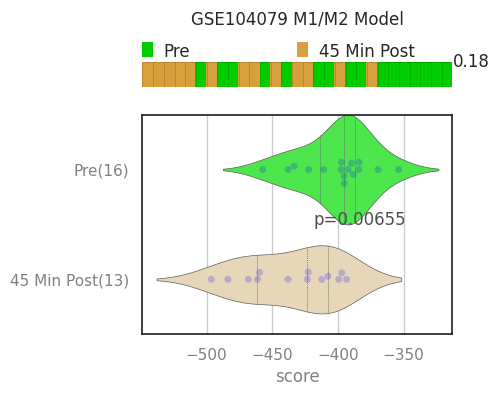

Turan 2013 Human COPD Patients (n = 54)
GSE27536 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M14
54 [27, 27] GSE27536 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M14 M14
[106]


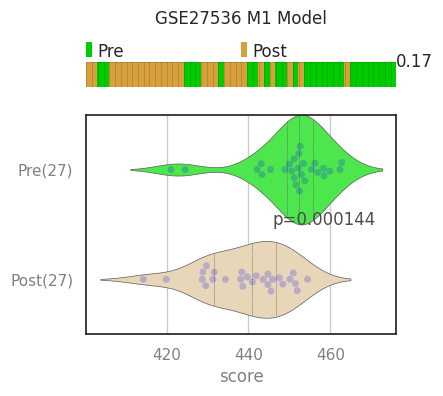

Popov 2019 Human One Leg Exercised (n = 84)
GSE120862 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M5
84 [42, 42] GSE120862 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M5 M5
[49, 113, 125]


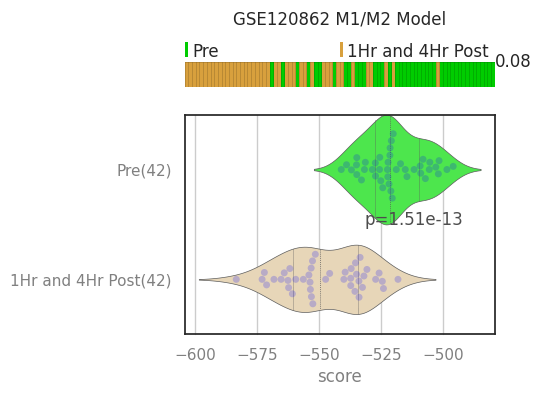

Abbasi 2016 Human Leukocytes Sex Specific Endotoxins and Exercise (n = 64)
GSE83578 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB8
64 [16, 16, 16, 16] GSE83578 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB8 MB8
[146, 403, 442]


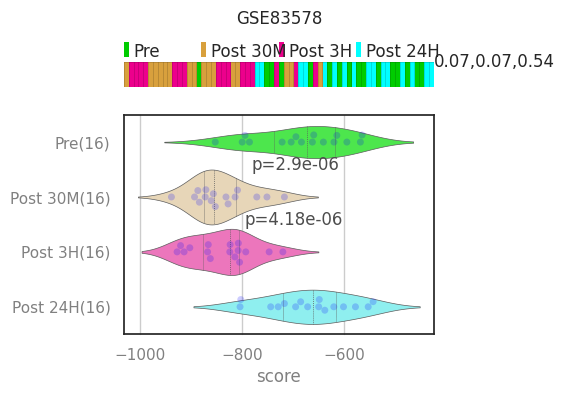

Silva 2018 Human Blood (n = 142)
GSE111555 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB2
32 [22, 10] GSE111555 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB2 MB2
[62, 132, 141]


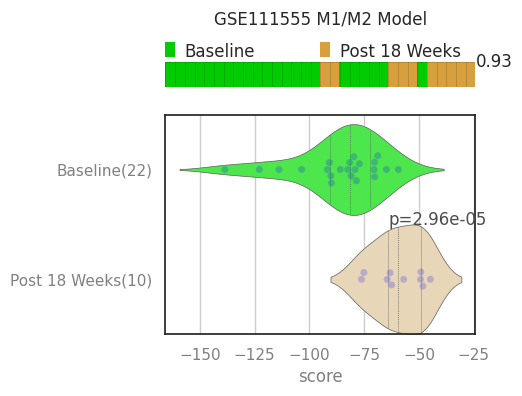

Laker 2017,  Human High Fat Diet and Exercise (n = 28)
GSE99963 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M74
28 [14, 14] GSE99963 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M74 M74
[48, 113, 124]


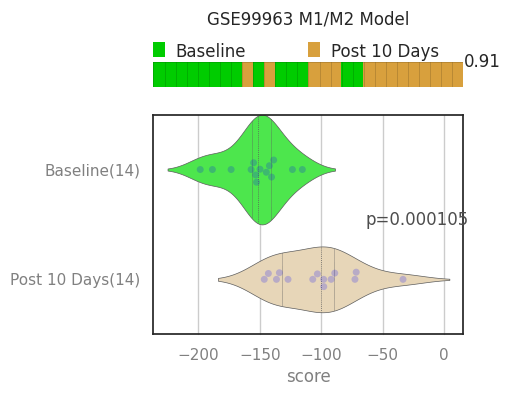

de Jong 2023, Homo sapiens, Muscle function in fit and (pre )frail males and females (n = 80)
GSE144304 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL98
56 [26, 30] GSE144304 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL98 MUSL98
[49, 113, 124]


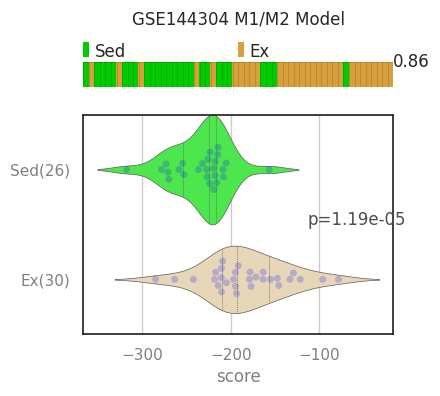

Gordon 2014, Human 12 Week One Arm RT One Arm Not (n = 14)
GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68
14 [7, 7] GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68 M68
[106, 361, 351]


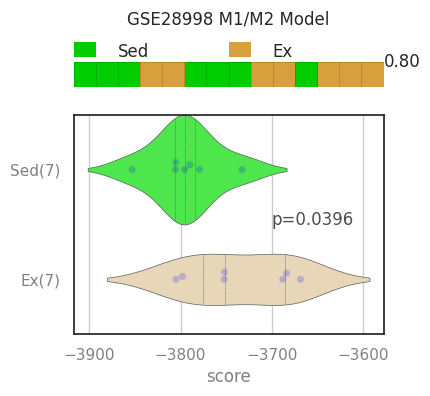

Chopard 2009, Homo sapiens, Sol and VL Post Bed Rest (n = 170)
GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61
80 [44, 36] GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61 M61
[81]


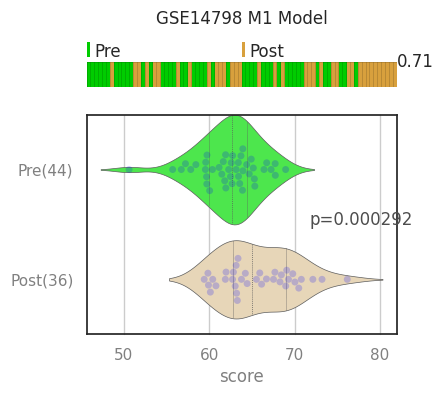

Abadi 2009, Human Unilateral Limb Immobilization (n = 72)
GSE14901 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M62
72 [24, 24, 24] GSE14901 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M62 M62
[106, 361, 351]


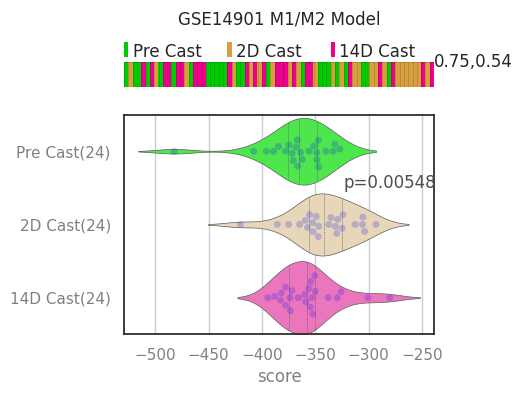

In [77]:
makeFigure3(show=True,save=True)

<a id="fig4"></a>
# Figure 4
[Return](#TOC)

In [276]:
def getAllSedExAnas():
    sedExAnaLst=[]
    ana = ExerciseAnalysis()
    ana.getLiu2017()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRowlands2014()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLanza2008()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getGordon2012()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getBarberio2016()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRobinson2017()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getTeranGarcia2005()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getVanDenHoek2021()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getKivela2010()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getDeSanctis2021()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getKhakehi2020()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMoore2023()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getTimmons2020()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getPoelkens2013()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLee2022()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getScheler2013()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLindholm2016()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getPollanen2010()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getZambon2003()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getPattamaprapanont2017()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getKnudsen2020()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getSakharov2012()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getCatoire2012()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getReich2010()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getSchjerling2014()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getFurrer2023(tn=2)
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLaker2017()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMukherjee2013()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMaier2022()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getdeJong2023()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHoene2018()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRubenstien2020()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getNair2024Muscle()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMSDBMuscle()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getSilva2018()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getChen2002()
    gse=ana.h.getSource().split(' ')[0]
    sedExAnaLst.append((gse,ana))
    
    return sedExAnaLst


def getAllPrePostAnas():
    prePostAnaLst=[]
    
    ana = ExerciseAnalysis()
    ana.getFurrer2023()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getTonevitsky2013()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getSu2015()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getBohm2016()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLavin2020()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getCatoire2014()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getStepto2009()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getEngeli2012()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getClarke2018()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getPopov2019()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMiyamotoMikami2018()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getButtner2007()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getEdman2024()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRundqvist2019()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMarosi2018()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getNeubauer2013()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getNarkar2008()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getAbbasi2016(tn=2)
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getBeiter2024()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getSawada2019()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getTarnopolsky2007()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHangelbroek2016()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getTuran2011()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRaue2012()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLiu2010()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHyldahl2010()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMacNeil2010()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRowlands2011()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRadomAizik2005()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getCrane2012()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMcLean2015()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHansen2015()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getColetta2016()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRomero2016()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMcLlvenna2022()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMahoney2005()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getKostek2007()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getButtner2007()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getvanTienen2012()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getVega2020()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getLammers2012()
    gse=ana.h.getSource().split(' ')[0]
    prePostAnaLst.append((gse,ana))
    
    return prePostAnaLst

def makeCompareDf(resLst,condName,frst,snd):
    n=0
    for gse,auc,pval in resLst:
        if n%2==0:
            cond=frst
        else:
            cond=snd
        new_row=[gse,float(auc),float(pval),cond]
        if n==0:
            df=pd.DataFrame(new_row).T
            df.columns=['ID','ROC-AUC','Pval',condName]
        else:
            df.loc[len(df.index)]=new_row
        df=df.fillna(0)
        n+=1
    return df

def plotAllExercise(anaLst,l1,wt,pdf,save=False,show=True,plotTitle='Pre v Post'):
    """
    plotAllExercise
        Inputs: 
            anaLst, list of with ana dataset, of each dataset that will be plotted
            l1, list (of lists), list of lists containing genes from within a cluster
            wt, list of lists, containing the weights to use when plotting
            save, bool, if True will save the plot, if False will overwrite savePdf and savePng
                    default=True
            show, bool, if True will show the plot 
                    default=True
            plotTitle, str, name for the title on the top of the barplots, deafault='Pre v Post'
        Output:
            resLst, list (of tuples), list of tuples containg the gse number, ROC-AUC value, and p-value of 
                    all the datasets that where included in the plot
            depneding on values of save/savePdf/savePng and show will also save and/or show the created plot
    """
    resLst=[]
    import bone
    reload(bone)
    fig = plt.figure(figsize=(10,10))
    n1 = len(anaLst)
    axlist = []
    for i in range(n1):
        ax = plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])
    acolor = ["#00CC00", "#D8A03D","#EC008C",
              'cyan', "#B741DC", "#808285",
              'blue', 'black', 'green', 'red',
              'orange', 'brown', 'pink', 'purple']
    axNum=0
    for gse,ana in anaLst:
        ana.orderData(l1,wt)
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
                  'w': 4, 'h': 0.5, 'atypes': [],'cval': ana.cval, 'ax': axlist[axNum]}
        desc = gse + f" ({len(ana.state[0])},{len(ana.state[1])})"
        ax = ana.printTitleBar(params)
        ax.text(-1, 2, desc, horizontalalignment='right', verticalalignment='center')
        
        auc = float(ana.getMetrics(ana.cval[0]))
        pval=float(getPval(ana))
        roc_auc = "%.2f %.3g" % (auc, pval)
        ax.text(len(ana.cval[0]), 2, roc_auc)
        resLst.append((gse,auc,pval))
        axNum+=1
    ax=axlist[0]
    ax.set_title(plotTitle)
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    else:
        plt.close()
    return resLst

def getPval(ana,macs=False):
    lval, score = ana.getScores()
    if macs:
        t, p = ttest_ind(lval[1],lval[2], equal_var=False)
    else:
        t, p = ttest_ind(lval[0],lval[1], equal_var=False)
    desc = "%.3g" % (p)
    return desc

def prePareFig4(save=False,run=True,show=False):
    if run:
        sedExAnas=getAllSedExAnas()
        prePostAnas=getAllPrePostAnas()
        l1=macLst
        wt=[-1,1,2]
        resLstPre=plotAllExercise(prePostAnas,l1,wt,pdf=None,show=show)
        resLstSed=plotAllExercise(sedExAnas,l1,wt,plotTitle='Sedentary v Exercise',pdf=None,show=show)

        dfSed=makeCompareDf(resLstSed,condName='Exercise Type',frst='Training',snd='Training')
        dfPre=makeCompareDf(resLstPre,condName='Exercise Type',frst='Immediate',snd='Immediate')

        df=pd.concat([dfSed,dfPre])
        df['-Log10 P value']=abs(-np.log10(df['Pval']))
        df['Significant']=df['Pval']<=0.05
        df.index=df['ID']
        if save:
            df.to_csv('./Files/SupplementaryTable1_Immediate_and_Training_Datasets_ROCAUC_Pvalues.csv',index=False)
    else:
        df=pd.read_csv('./Files/SupplementaryTable1_Immediate_and_Training_Datasets_ROCAUC_Pvalues.csv')
    data2=pd.read_csv('./Files/MacrophageExercise_DatasetsInfo.csv',index_col=0)
    return df,data2

def makeDotPlot(df,saveName='DotPlot.png',title='Macrophage Exercise Score, Post v Pre',
                x='ROC-AUC',y='ID',color='Exercise Type',size='-Log10 P value',opac='Significant',
                rev=True,save=True,rangeIn=[100,500]):
    chart=alt.Chart(df).mark_circle().encode(x=alt.X(x,scale=alt.Scale(domain=[0, 1])),
                                             y=y,
                                             color=color,
                                             opacity=opac,
                                             size=alt.Size(size,
                                                           scale=alt.Scale(range=rangeIn,bins=[0,5,10,15,20],
                                                                           reverse=rev))).properties(title=title)
    if save:
        chart.save(saveName)
    return chart

def makeFig4A(df,data2,save=False):
    resLst=list(data2[data2['Exercise Type']=='Resistance/Strength'].index)
    saveName='./Files/Figs/4A_Resistance_Training.svg'
    title='Resistance Exercise'
    dfIn=df.loc[resLst]
    chart1=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save)
    
    endurLst=['GSE104079','GSE111555','GSE117070','GSE11803','GSE120862',
              'GSE122671','GSE139258','GSE155271','GSE198266','GSE4252',
              'GSE1786','GSE178262','GSE221210','GSE28498',
              'GSE40551','GSE467','GSE83578']
    saveName='./Files/Figs/4A_Endurance_Training.svg'
    title='Endurance Exercise'
    dfIn=df.loc[endurLst]
    chart2=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save)
    
    return chart1,chart2

def makeFig4B(df,save=False):
    bloodLst=['GSE111555', 'GSE122671', 'GSE28498','GSE46075','GSE5105','GSE68072']
    saveName='./Files/Figs/4B_BloodSample.svg'
    title='PBMC Blood'
    dfIn=df.loc[bloodLst]
    chart1=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save)
    
    df2Lst=['GSE104079','GSE117070','GSE144304','GSE9103','GSE199225','GSE99963']
    saveName='./Files/Figs/4B_MuscleSample.svg'
    title='Muscle Biopsy'
    dfIn=df.loc[df2Lst]
    chart2=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save)
    
    return chart1,chart2

def makeFig4C(df,save=False):
    humanLst=['GSE111555','GSE117070','GSE120862','GSE144304','GSE83578','GSE178262']
    saveName='./Files/Figs/4C_Human.svg'
    title='Human'
    dfIn=df.loc[humanLst]
    chart1=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save,rangeIn=[100,500])
    
    mouseLst=['GSE104079','GSE198266','GSE11803','GSE178262','GSE467']
    saveName='./Files/Figs/4C_Mouse.svg'
    title='Mouse'
    dfIn=df.loc[mouseLst]
    chart2=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save,rangeIn=[100,300])
    
    return chart1,chart2

def makeFig4D(df,save=False):
    rnaSeqLst=['GSE120862','GSE140089','GSE198266','GSE178262','GSE144304','GSE221210','GSE99963']
    saveName='./Files/Figs/4D_RNASeq.svg'
    title='RNA-Seq'
    dfIn=df.loc[rnaSeqLst]
    chart1=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save)
    
    arrayDf=['GSE104079','GSE117525','GSE122671','GSE16907','GSE28498','GSE44051','GSE9103']
    saveName='./Files/Figs/4D_MicroArray.svg'
    title='Microarray'
    dfIn=df.loc[arrayDf]
    chart2=makeDotPlot(dfIn,saveName=saveName,title=title,rev=False,save=save,rangeIn=[100,200])
    return chart1,chart2

def makeFig4(save=False,run=True,show=False):
    chartLst=[]
    df,data2=prePareFig4(save=save,run=run,show=show)
    chart1,chart2=makeFig4A(df,data2,save)
    chartLst.extend([chart1,chart2])
    chart1,chart2=makeFig4B(df,save)
    chartLst.extend([chart1,chart2])
    chart1,chart2=makeFig4C(df,save)
    chartLst.extend([chart1,chart2])
    chart1,chart2=makeFig4D(df,save)
    chartLst.extend([chart1,chart2])
    return chartLst

In [165]:
chartLst=makeFig4(save=True)


Liu 2017 Peripheral Leukocytes in Young Endurance Athletes (n = 23)
GSE68072 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB7
23 [11, 12] GSE68072 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB7 MB7
Rowlands 2014, Human Type 2 Dieabtes 16 Weeks Aerobic or Resistance Training (n = 30)
GSE58249 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M51
14 [7, 7] GSE58249 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M51 M51
Lanza 2008, Human 4 Years Athlete vs Sedentary (n = 40)
GSE9103 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M53
20 [10, 10] GSE9103 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M53 M53
Gordon 2014, Human 12 Week One Arm RT One Arm Not (n = 14)
GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68
14 [7, 7] GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68 M68
Barberio 2016, Human STRRIDE Glucose Tolerance Test (n = 84)
GSE83352 http://hegemon.ucsd.edu/Tools/explore.php?key=polyp

Tonevitsky 2013 Human miRNA mRNA regulatory networks (n = 56)
GSE46075 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB4
56 [16, 40] GSE46075 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB4 MB4
Su 2015 skeletal muscle U133a (n = 553)
E-MTAB-1788 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MSL2
90 [84, 6] E-MTAB-1788 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MSL2 MSL2
Böhm 2016, Human TGFβ Insluin 8 Weeks Enduracne (n = 36)
GSE72462 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M52
36 [18, 18] GSE72462 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M52 M52
Lavin 2020, Homo sapiens, Rehabilitative Impact of Exercise Training in Parkinson’s Disease (n = 41)
GSE140089 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL100
17 [12, 5] GSE140089 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL100 MUSL100
Catoire 2013 Human Mixed Exercise Training (n = 36)
GSE53598 http://hegemon.ucsd.edu/Tools/explore.php?

Vega 2020 Human Skeletal Aerobic Exercise (n = 24)
GSE139258 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M33
12 [6, 6] GSE139258 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M33 M33
Lammers 2013, Human Unilateral Lower Limb Suspension and Spinal Cord Injury (n = 14)
GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64
6 [3, 3] GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64 M64
[43, 100, 103]
[54, 150, 163]
[43, 97, 106]
[62, 132, 141]
[48, 113, 124]
[54, 167, 172]
[56, 98, 100]
[46, 113, 130]
[106, 361, 351]
[49, 113, 125]
[48, 120, 132]
[106, 361, 351]
[47, 111, 121]
[54, 150, 163]
[95, 182, 192]
[93, 246, 244]
[61, 155, 166]
[146, 403, 442]
[117, 292, 332]
[73, 180, 189]
[65, 130, 140]
[46, 103, 116]
[106, 361, 351]
[106, 361, 351]
[106, 361, 351]
[79, 255, 253]
[61, 132, 140]
[72, 160, 161]
[84, 255, 255]
[300, 777, 786]
[115, 283, 272]
[54, 150, 163]
[79, 255, 253]
[62, 127, 134]
[46, 112, 116]
[19, 55, 64]
[9, 9, 12]
[10

In [140]:
chartLst[0]

alt.Chart(...)

In [141]:
chartLst[1]

alt.Chart(...)

In [142]:
chartLst[2]

alt.Chart(...)

In [143]:
chartLst[3]

alt.Chart(...)

In [144]:
chartLst[4]

alt.Chart(...)

In [145]:
chartLst[5]

alt.Chart(...)

In [146]:
chartLst[6]

alt.Chart(...)

In [147]:
chartLst[7]

alt.Chart(...)

<a id="fig5"></a>
# Figure 5
[Return](#TOC)

In [277]:
def prePareFig5A(save=False):
    wt1=[-1,1,2]
    l1=macLst

    anaLst=[]

    gse='GSE117525'
    ana = ExerciseAnalysis()
    ana.getHangelbroek2016(tn=2)
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHangelbroek2016(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRundqvist2019(tn=2)
    gse='GSE126296'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRundqvist2019(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getVega2020(tn=2)
    gse='GSE139258'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getVega2020(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLavin2020(tn=2)
    gse='GSE140089'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLavin2020(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=4)
    gse='GSE144304'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=5)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLiu2010(tn=2)
    gse='GSE24235'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLiu2010(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRaue2012(tn=3)
    gse='GSE28422'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRaue2012(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getGordon2012(tn=2)
    gse='GSE28998'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getGordon2012(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getMcLean2015(tn=2)
    gse='GSE43219'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getMcLean2015(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getScheler2013(tn=3)
    gse='GSE44051'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getScheler2013(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLindholm2016(tn=2)
    gse='GSE60591'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLindholm2016(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getColetta2016(tn=2)
    gse='GSE68585'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getColetta2016(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getEdman2024(tn=4)
    gse='GSE252357'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getEdman2024(tn=5)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getEdman2024(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getEdman2024(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getBohm2016(tn=2)
    gse='GSE72462'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getBohm2016(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getBarberio2016(tn=2)
    gse='GSE83352'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getBarberio2016(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getAbbasi2016(tn=3)
    gse='GSE83578'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getAbbasi2016(tn=4)
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    
    ana = ExerciseAnalysis()
    ana.getMelov2007(tn=1)
    gse='GSE8479'
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMelov2007(tn=2)
    anaLst.append((gse,ana))

    gendResLst=plotAllExercise(anaLst,l1,wt1,pdf=None,show=False)
    df=makeCompareDf(gendResLst,condName='Gender',frst='Male',snd='Female')
    if save:
        df.to_csv('Gender_ROC_Pvals_Res.csv')
    return df

# Exercise Type
def prePareFig5B(save=False):
    wt1=[-1,1,2]
    l1=macLst

    anaLst=[]

    ana = ExerciseAnalysis()
    ana.getTonevitsky2013(tn=2)
    gse='GSE46075'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getTonevitsky2013(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRobinson2017(tn=2)
    gse='GSE97084'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRobinson2017(tn=4)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getStepto2009(tn=2)
    gse='GSE9405'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getStepto2009(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getSchjerling2014(tn=1)
    gse='GSE59088'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getSchjerling2014(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRowlands2014(tn=2)
    gse='GSE58249'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRowlands2014(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getDeSanctis2021(tn=2)
    gse='GSE165630'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getDeSanctis2021(tn=1)
    anaLst.append((gse,ana))

    exercisetypeResLst=plotAllExercise(anaLst,l1,wt1,pdf=None,show=False)
    df=makeCompareDf(exercisetypeResLst,condName='Exercise Type',
                      frst='Endurance/Aerobic',snd='Resistance/Strength')
    if save:
        df.to_csv('ExerciseType_ROC_Pvals_Res.csv')
    return df

def prePareFig5C(save=False):
    wt1=[-1,1,2]
    l1=macLst

    anaLst=[]

    ana = ExerciseAnalysis()
    ana.getSilva2018(tn=2)
    gse='GSE111555'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getSilva2018(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=6)
    gse='GSE144304'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=7)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRampersaud2013(tn=1)
    gse='GSE34788'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRampersaud2013(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getTonevitsky2013(tn=2)
    gse='GSE46075'
    anaLst.append((gse,ana))

    intensityResLst=plotAllExercise(anaLst,l1,wt1,pdf=None,show=False)
    df=makeCompareDf(intensityResLst,condName='Intensity',frst='Low',snd='High')
    if save:
        df.to_csv('Intensity_ROC_Pvals_Res.csv')
    return df

def prePareFig5D(save=False):
    wt1=[-1,1,2]
    l1=macLst

    anaLst=[]

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=3)
    gse='GSE144304'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getdeJong2023(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLee2022(tn=1)
    gse='GSE198266'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getLee2022(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRubenstien2020(tn=3)
    gse='GSE236600'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRubenstien2020(tn=2)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRaue2012(tn=2)
    gse='GSE28422'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRaue2012(tn=3)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getMelov2007(tn=3) 
    gse='GSE8479'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getMelov2007(tn=1)
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRobinson2017(tn=2)
    gse='GSE97084'
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getRobinson2017(tn=3)
    anaLst.append((gse,ana))

    ageResLst=plotAllExercise(anaLst,l1,wt1,pdf=None,show=False)
    df=makeCompareDf(ageResLst,condName='Age',frst='Young',snd='Old')
    if save:
        df.to_csv('Age_ROC_Pvals_Res.csv')
    return df

def prePareFig5(save=False,run=True):
    if run:
        genderDf=prePareFig5A(save)
        exerciseTypeDf=prePareFig5B(save)
        intensityDf=prePareFig5C(save)
        ageDf=prePareFig5D(save)
        dfLst=[genderDf,exerciseTypeDf,intensityDf,ageDf]
        df=pd.concat(dfLst)
        df=df.fillna('')
        df['-Log10 P value']=-np.log10(df['Pval'])
        df['Significant']=df['Pval']<=0.05
    else:
        df=pd.read_csv('./Files/SupplementaryTable2_Genders_ExerciseTypes_Intensities_Ages.csv')
    if save:
        df.to_csv('./Files/SupplementaryTable2_Genders_ExerciseTypes_Intensities_Ages.csv',index=False)
    df.index=df['ID']
    return df


In [278]:
def makeFig5A(df,condCol='Gender',saveName='./Files/Figs/Fig5A_Gender.svg',title='Gender',save=True):
    df2 = df[df[condCol]!='']
    df2 = df2[df2[condCol].notnull()]
    chart=makeDotPlot(df2,saveName=saveName,title=title,
                      x='ROC-AUC',y='ID',color=condCol,size='-Log10 P value',
                      opac='Significant',rev=True,save=save)
    return chart

def makeFig5B(df,condCol='Exercise Type',saveName='./Files/Figs/Fig5B_ExerciseType.svg',title='Exercise Type',save=True):
    df2 = df[df[condCol]!='']
    df2 = df2[df2[condCol].notnull()]
    chart=makeDotPlot(df2,saveName=saveName,title=title,
                      x='ROC-AUC',y='ID',color=condCol,size='-Log10 P value',
                      opac='Significant',rev=True,save=save)
    return chart

def makeFig5C(df,condCol='Intensity',saveName='./Files/Figs/Fig5C_Intensity.svg',title='Intensity',save=False):
    df2 = df[df[condCol]!='']
    df2 = df2[df2[condCol].notnull()]
    chart=makeDotPlot(df2,saveName=saveName,title=title,
                      x='ROC-AUC',y='ID',color=condCol,size='-Log10 P value',
                      opac='Significant',rev=True,save=save)
    return chart

def makeFig5D(df,condCol='Age',saveName='./Files/Figs/Fig5D_Age.svg',title='Age',save=False):
    df2 = df[df[condCol]!='']
    df2 = df2[df2[condCol].notnull()]
    chart=makeDotPlot(df2,saveName=saveName,title=title,
                      x='ROC-AUC',y='ID',color=condCol,size='-Log10 P value',
                      opac='Significant',rev=True,save=save)
    return chart

def makeFig5(save=True,run=False):
    df=prePareFig5(save=save,run=run)
    chartLst=[]
    chartA=makeFig5A(df,save=save)
    chartB=makeFig5B(df,save=save)
    chartC=makeFig5C(df,save=save)
    chartD=makeFig5D(df,save=save)
    chartLst=[chartA,chartB,chartC,chartD]
    return chartLst

In [227]:
chartLst=makeFig5(save=True)

In [228]:
chartLst[0]

alt.Chart(...)

In [229]:
chartLst[1]

alt.Chart(...)

In [230]:
chartLst[2]

alt.Chart(...)

In [231]:
chartLst[3]

alt.Chart(...)

<a id="fig6"></a>
# Figure 6
[Return](#TOC)

In [286]:
def getOppPattLists(runSig=True,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt',runExOpp=True,pvalThres=0.1,save=True):
    """
    getOppPattLists
        Inputs:
            runSig, bool, if True will run serch for significant M1/M2 genes, 
                          if False will get sig genes from reading the sigFileName file
                    default: True
            sigFileName, str, name/path of file which contains the M1/M2 significant genes, will be used if runSig=False
                    default: 'Mac_M1M2_Sig_Genes.txt'
            runExOpp, bool, if True will run the search for the Group 1 (pattLst) and Group 2 (oppLst) gene sets
                            if False will get the gene Groups from reading the Group1 and Group2 files
                    default: True
            pvalThres, float, the pvalue threshold under which the M1/M2 genes are considered significant
                    default: 0.1
        Outputs:
            returns 3 lists, the genes that were significantly different between M1 and M2
                             the genes that are within Group1 
                                 (the genes will be in 3 lists relating to the 13,14,3 clusters)
                         and the genes that are within Group2
                                 (the genes will be in 3 lists relating to the 13,14,3 clusters)
    """
    if runSig:
        sigMacGenes=getSigMacGenes(allGenes,clust13Genes,clust14Genes,save=save,
                                   saveName=sigFileName,pvalThres=pvalThres)
    else:
        sigMacGenes=list(set(readLst(sigFileName)))
    if runExOpp:
        pattLst,oppLst=getOppandPatternGenes(sigMacGenes,clust13Genes,clust14Genes,save=save)
    else:
        filt=set(["'",'['])
        pattLst=readLst('./Files/Group1Genes.txt',sep2=',',filt=filt)
        oppLst=readLst('./Files/Group2Genes.txt',sep2=',',filt=filt)
    return pattLst,oppLst

def getSigMacGenes(allGenes,clust13Genes,clust14Genes,save=True,saveName='Mac_M1M2_Sig_Genes.txt',pvalThres=0.05):
    sigGenes=set()
    reload(bone)
    reload(mut)
    for gene in allGenes:
        l1=[[gene]]
        if gene in clust13Genes:
            wt=[-1]
        elif gene in clust14Genes:
            wt=[1]
        else:
            wt=[2]
        ana = mut.MacAnalysis()
        ana.getGEOMacAnn()
        ana.orderDataDf(l1, wt)
        res=ana.getMacMetrics(ana.cval[0])
        pval=getPval(ana,macs=True)
        if float(pval)<=pvalThres:
            sigGenes.add(gene)
    sigGenes=list(sigGenes)
    if save:
        saveLst(sigGenes,saveName)
    return sigGenes

def getOppandPatternGenes(sigMacGenes,clust13Genes,clust14Genes,save=True):
    prePostAnaLst=getAllPrePostAnas()
    sedExAnaLst=getAllSedExAnas()
    oppLst=[];pattLst=[]
    thres=4
    thres2=2
    n=0
    for gene in sigMacGenes:
        n+=1
        oppNum,pattNum=getOppPattNums(prePostAnaLst,gene,clust13Genes,clust14Genes)
        pattNum2,oppNum2=getOppPattNums(sedExAnaLst,gene,clust13Genes,clust14Genes)
        if oppNum >=thres and oppNum2 >=thres2:
            oppLst.append(gene)
        if pattNum >=thres and pattNum2 >=thres2:
            pattLst.append(gene)
    oppLst.extend(['LIMK2', 'IL15', 'APOL6'])
    pattLst.extend(['TNFSF10','ZNF274','UGP2'])
    oppLst.sort()
    pattLst.sort()
    pattLst=filtPattLst(pattLst,clust13Genes,clust14Genes)
    oppLst=getListsInClusters(oppLst,clust13Genes,clust14Genes)
    pattLst=getListsInClusters(pattLst,clust13Genes,clust14Genes)
    if save:
        saveLst(pattLst,'./Files/Group1Genes.txt')
        saveLst(oppLst,'./Files/Group2Genes.txt')
    return pattLst,oppLst

def filtPattLst(pattLst,clust13Genes,clust14Genes):
    pattLst2=[]
    ana=ExerciseAnalysis()
    ana.getRaue2012(tn=1)
    for gene in pattLst2:
        l1,wt=getGeneWeight(gene,clust13Genes,clust14Genes)
        ana.orderData(l1,wt)
        res = ana.getMetrics(ana.cval[0])
        pval=getPval(ana)
        if float(pval)<=0.05 and isGenePatt(gene,res,clust13Genes):
            pattLst2.append(gene)
    return pattLst2



def getOppPattNums(anaLst,gene,clust13Genes,clust14Genes):
    l1,wt=getGeneWeight(gene,clust13Genes,clust14Genes)
    oppNum=0;pattNum=0
    for gse,ana in anaLst:
        ana.orderData(l1,wt)
        res=ana.getMetrics(ana.cval[0])
        pval=getPval(ana)
        if isGeneOpp(gene,res,clust13Genes):
            oppNum+=1
        if isGenePatt(gene,res,clust13Genes):
            pattNum+=1
    return oppNum,pattNum

def isGeneOpp(gene,res,clust13Genes):
    if float(res)<0.3 or float(res)>0.7:
        if gene in clust13Genes:
            if float(res)>0.7:
                return True
            else:
                return False
        else:
            if float(res)<0.3:
                return True
            else:
                return False
    else:
        return False
def isGenePatt(gene,res,clust13Genes):
    if float(res)<0.3 or float(res)>0.7:
        if gene in clust13Genes:
            if float(res)>0.7:
                return False
            else:
                return True
        else:
            if float(res)<0.3:
                return False
            else:
                return True
    else:
        return False
    
def getGeneWeight(gene,clust13Genes,clust14Genes):
    l1=[[gene]]
    if gene in clust13Genes:
        wt=[-1]
    elif gene in clust14Genes:
        wt=[1]
    else:
        wt=[2]
    return l1,wt

def getListsInClusters(lst,clust13Genes,clust14Genes):
    lst2=[[],[],[]]
    for gene in lst:
        if gene in clust13Genes:
            lst2[0].append(gene)
        else:
            if gene in clust14Genes:
                lst2[1].append(gene)
            else:
                lst2[2].append(gene)
    return lst2

def plotGroup1v2(pdf,ana,l1,l2,wt,gse,save=False,show=True,):
    figue=bone.processData(ana,l1,wt)
    plt.title(gse+' Group 1')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    else:
        plt.close()
    figue=bone.processData(ana,l2,wt)
    plt.title(gse+' Group 2')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    else:
        plt.close()
    return

def makeFig6A(pdf,save=False,show=True,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt'):
    pattLst,oppLst=getOppPattLists(runSig=False,sigFileName=sigFileName,runExOpp=False)
    wt=[-1,1,2]
    l1=pattLst
    reload(mut)
    ana = mut.MacAnalysis()
    ana.getGEOMacAnn()
    ana.orderDataDf(l1, wt)
    fig = mut.plotViolinBar(ana, "Mac")
    ana.getMacMetrics(ana.cval[0])
    plt.title('Group 1')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    else:
        plt.close()
    l2=oppLst
    reload(mut)
    ana = mut.MacAnalysis()
    ana.getGEOMacAnn()
    ana.orderDataDf(l2, wt)
    fig = mut.plotViolinBar(ana, "Mac")
    ana.getMacMetrics(ana.cval[0])
    plt.title('Group 2')
    if save:
        pdf.savefig(transparent=True, bbox_inches = 'tight')
    if show:
        plt.show()
    else:
        plt.close()
    return 

def makeFig6B(pdf,save=False,show=True,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt'):
    pattLst,oppLst=getOppPattLists(runSig=False,sigFileName=sigFileName,runExOpp=False)
    anaLst=[]
    wt=[-1,1,2]
    
    ana = ExerciseAnalysis()
    ana.getMcLean2015()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana = ExerciseAnalysis()
    ana.getEdman2024()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    

    ana=ExerciseAnalysis()
    ana.getAbbasi2016(tn=2)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getMacNeil2010(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getRowlands2011(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getCrane2012(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getSawada2019()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getNeubauer2013()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMarosi2018()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRundqvist2019()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    l1=pattLst
    l2=oppLst
    plotAllExercise(anaLst, l1, wt, pdf=pdf, save=save, show=show,
                    plotTitle='Gene Model Group 1, Pre v Post (up to 6 Hours)')

    plotAllExercise(anaLst, l2, wt, pdf=pdf,save=save, show=show,
                    plotTitle='Gene Model Group 2, Pre v Post (up to 6 Hours)')
    return

def makeFig6C(pdf,save=False,show=True,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt'):
    pattLst,oppLst=getOppPattLists(runSig=False,sigFileName=sigFileName,runExOpp=False)
    anaLst=[]
    wt=[-1,1,2]


    ana=ExerciseAnalysis()
    ana.getLindholm2016()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    sedExAnaLst=[]
    ana = ExerciseAnalysis()
    ana.getLiu2017()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getKhakehi2020(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getGordon2012(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))

    ana=ExerciseAnalysis()
    ana.getRowlands2014(tn=1)
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMukherjee2013()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getHoene2018()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getMSDBMuscle()
    gse='MSdb'
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getReich2010()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    ana = ExerciseAnalysis()
    ana.getRubenstien2020()
    gse=ana.h.getSource().split(' ')[0]
    anaLst.append((gse,ana))
    
    l1=pattLst
    l2=oppLst
    plotAllExercise(anaLst, l1, wt, pdf=pdf, save=save, show=show,
                    plotTitle='Gene Model Group 1, Sedentary vs Trained (Min 10 Days)')

    plotAllExercise(anaLst, l2, wt, pdf=pdf, save=save, show=show,
                    plotTitle='Gene Model Group 2, Sedentary vs Trained (Min 10 Days)')
    return
def makeFig6D(pdf,save=False,show=True,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt'):
    reload(Datasets)
    pattLst,oppLst=getOppPattLists(runSig=False,sigFileName=sigFileName,runExOpp=False)
    l1=pattLst
    l2=oppLst
    wt=[1,1,1]
    
    runLst=[]
    ana1=ExerciseAnalysis()
    ana1.getTakahama2024Sepsis(tn=1)
    gse1='GSE224146'
    runLst.append((gse1,ana1))

    ana2=ExerciseAnalysis()
    ana2.getSato2020(tn=1)
    gse2='GSE142068'
    runLst.append((gse2,ana2))

    ana3=ExerciseAnalysis()
    ana3.getMoore2023(tn=2)
    gse3='GSE230102'
    runLst.append((gse3,ana3))

    ana4=ExerciseAnalysis()
    ana4.getAuerbach2014(tn=1)
    gse4='GSE59927'
    runLst.append((gse4,ana4))
    for gse,ana in runLst:
        plotGroup1v2(pdf,ana,l1,l2,wt,gse,save=save,show=show)
    return

def makeFig6(save=False,show=True,runSig=False,runExOpp=False,pvalThres=0.1,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt'):
    getOppPattLists(runSig=runSig,sigFileName=sigFileName,
                    runExOpp=runExOpp,pvalThres=pvalThres,save=save)
    if save:
        pdf=bone.getPDF('./Files/Figs/Figure6.pdf')
    else:
        pdf=None
    makeFig6A(pdf=pdf,save=save,show=show,sigFileName=sigFileName)
    makeFig6B(pdf=pdf,save=save,show=show,sigFileName=sigFileName)
    makeFig6C(pdf=pdf,save=save,show=show,sigFileName=sigFileName)
    makeFig6D(pdf=pdf,save=save,show=show,sigFileName=sigFileName)
    if save:
        pdf.close()
    return

Human Macrophages 2012 (n = 197)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=gbm&id=G16
68 [47, 13, 8] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=gbm&id=G16 G16
[6, 7, 5]


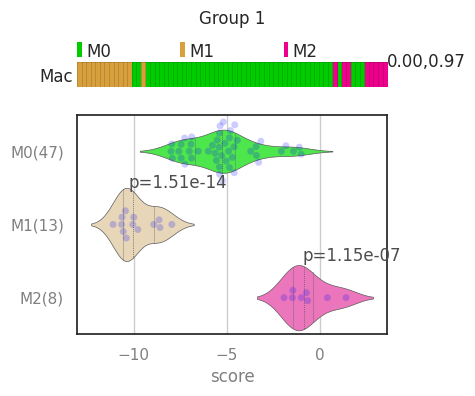

Human Macrophages 2012 (n = 197)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=gbm&id=G16
68 [47, 13, 8] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=gbm&id=G16 G16
[6, 26, 16]


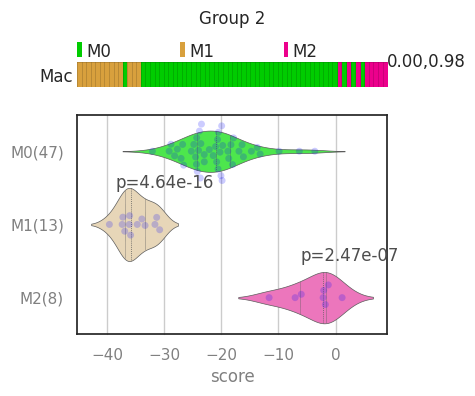

McLean 2015, Human Insulin Sensitivity Effect on Acute Exercise (n = 28)
GSE43219 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M42
28 [14, 14] GSE43219 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M42 M42
Edman 2024, Homo sapiens, 24 Hour Time Course of Integrated Molecular Responses to Resistance Exercise (n = 61)
GSE252357 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL97
24 [8, 16] GSE252357 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL97 MUSL97
Abbasi 2016 Human Leukocytes Sex Specific Endotoxins and Exercise (n = 64)
GSE83578 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB8
64 [32, 32] GSE83578 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB8 MB8
MacNeil 2010, Human Eccentric exercise (n = 64)
GSE19062 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M55
32 [16, 16] GSE19062 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M55 M55
Rowlands 2011, Human Protien Diet on Endurance Trained Cycling (n 

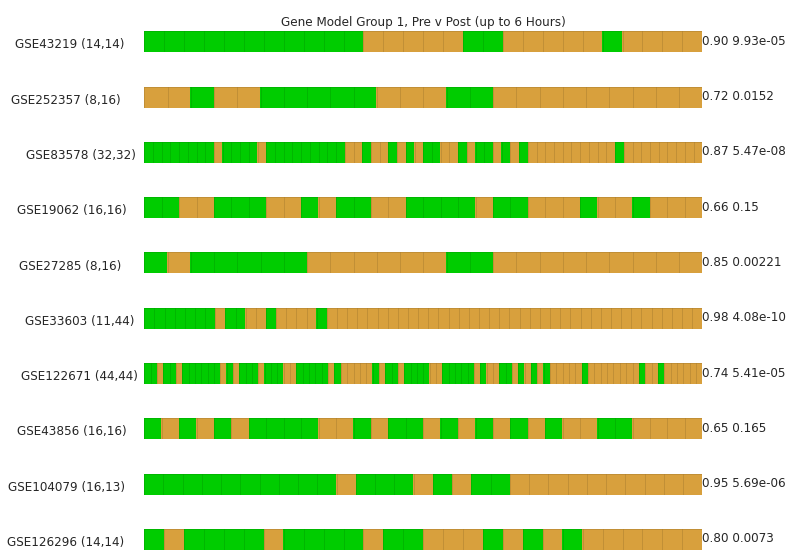

[7, 33, 11]
[3, 15, 7]
[16, 66, 15]
[5, 15, 7]
[6, 18, 8]
[27, 132, 33]
[6, 25, 10]
[9, 33, 12]
[3, 30, 8]
[4, 26, 8]


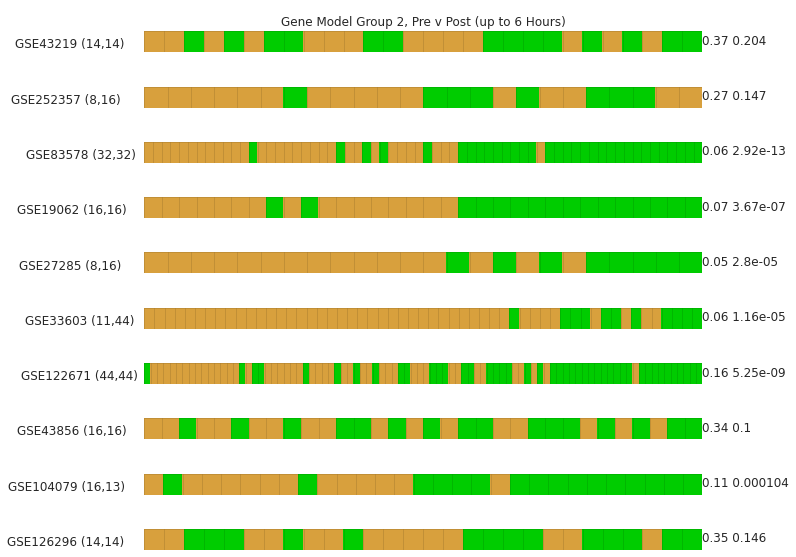

Lindholm 2016, Homo Sapiens, skeletal muscle response to training (n = 125)
GSE60591 GSE60833 GSE60590 GSE58608 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL77
125 [81, 44] GSE60591 GSE60833 GSE60590 GSE58608 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MUSL77 MUSL77
Liu 2017 Peripheral Leukocytes in Young Endurance Athletes (n = 23)
GSE68072 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB7
23 [11, 12] GSE68072 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB7 MB7
Kakehi 2020 Human Endurance Athletes (n = 13)
GSE155271 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M27
13 [8, 5] GSE155271 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M27 M27
Gordon 2014, Human 12 Week One Arm RT One Arm Not (n = 14)
GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68
14 [7, 7] GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68 M68
Rowlands 2014, Human Type 2 Dieabtes 16 Weeks Aerobic or Resistance Train

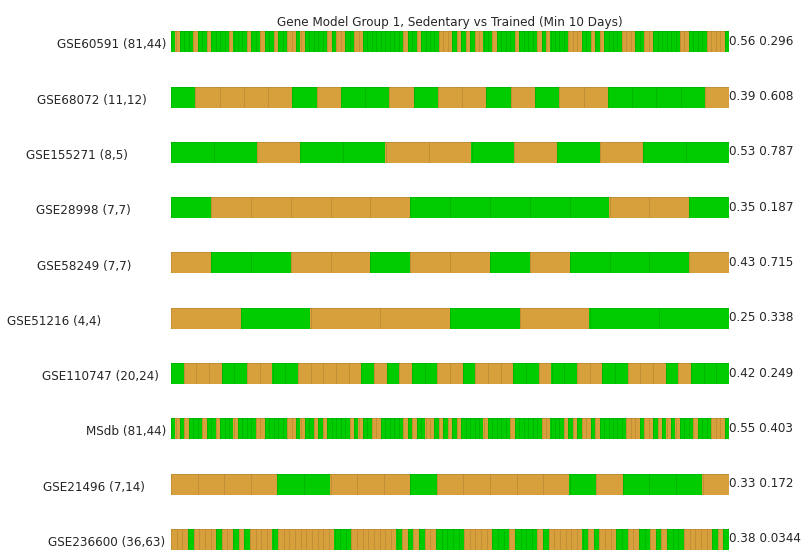

[3, 15, 7]
[4, 26, 8]
[9, 41, 17]
[9, 41, 17]
[9, 33, 12]
[7, 34, 11]
[3, 19, 5]
[3, 15, 7]
[9, 41, 17]
[3, 15, 7]


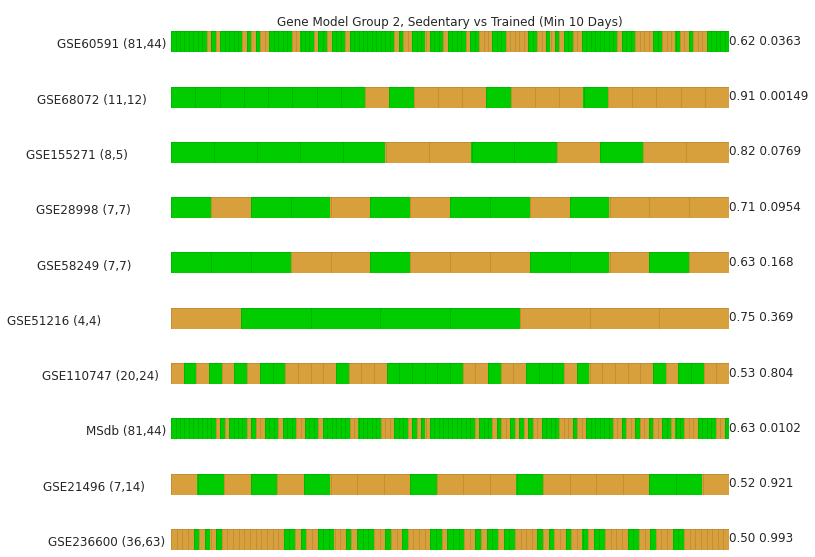

Takahama 2024 sepsis mm (n = 2413)
GSE224146 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV400
531 [264, 267] GSE224146 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV400 MACV400
Sato 2020 tissue drugs Mm (n = 868)
GSE142068 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV67
72 [36, 36] GSE142068 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV67 MACV67
Moore 2023, Mus Musculus, Adaptations to exercise training (n = 499)
GSE230102 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M105-0
200 [100, 100] GSE230102 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M105-0 M105-0
Auerbach 2014 drug Rat (n = 12921)
GSE59927 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV19
667 [562, 105] GSE59927 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV19 COV19
[2, 4, 3]


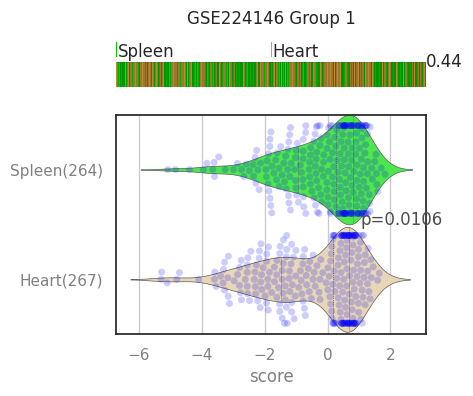

[3, 13, 5]


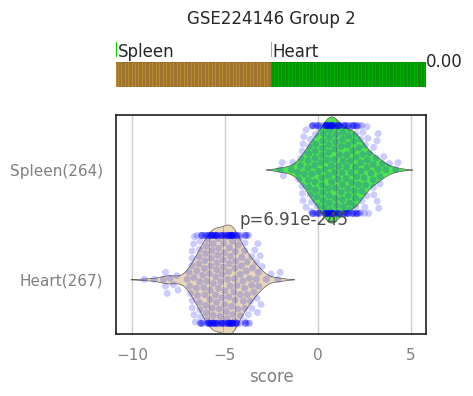

[2, 4, 3]


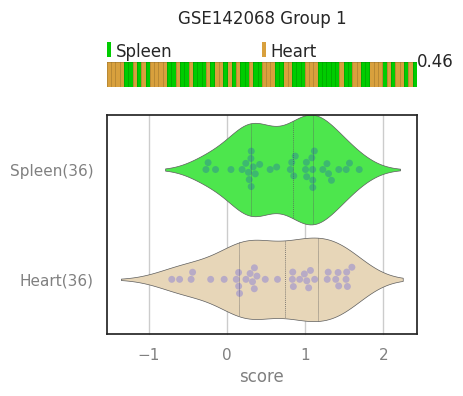

[3, 13, 5]


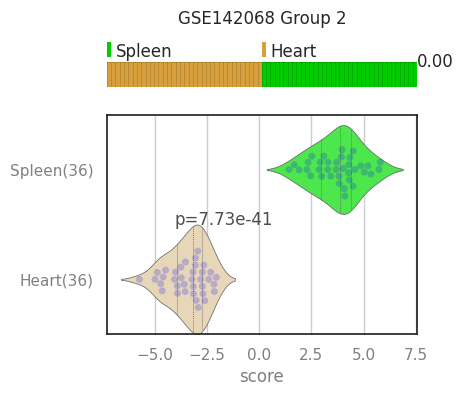

[2, 4, 3]


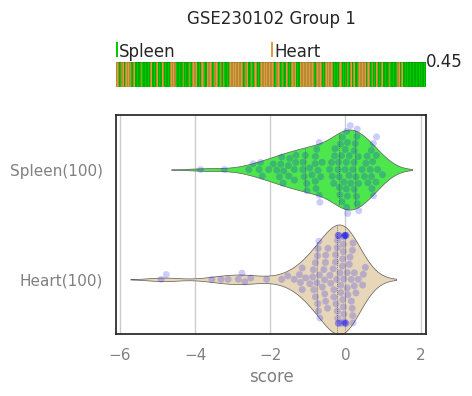

[3, 13, 6]


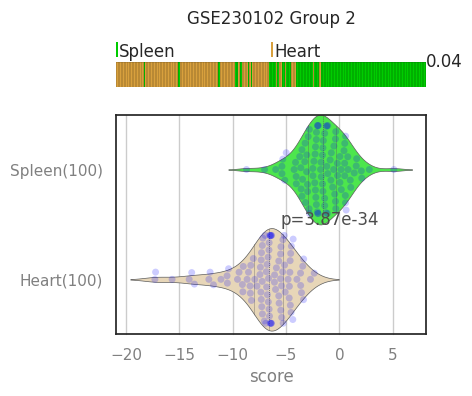

[0, 2, 1]


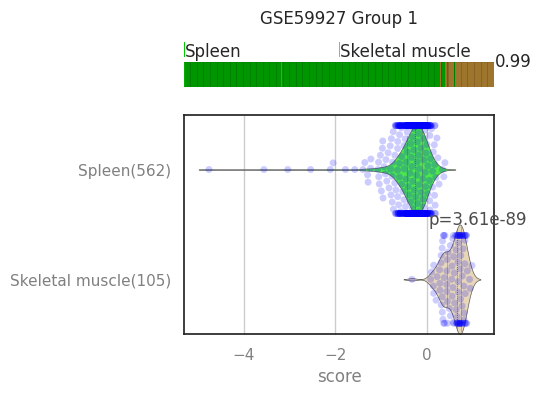

[1, 2, 1]


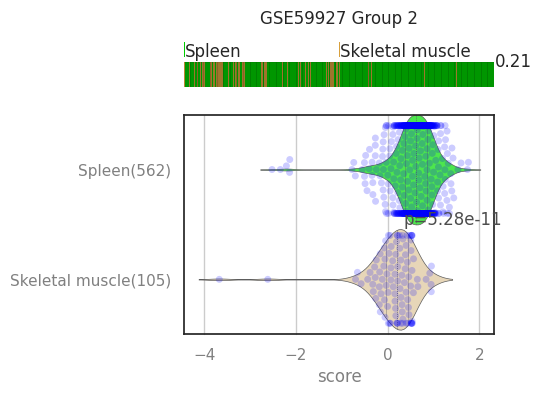

In [287]:
makeFig6(save=True,show=True,runSig=False,runExOpp=False,pvalThres=0.1,sigFileName='./Files/Mac_M1M2_Sig_Genes.txt')